<a href="https://colab.research.google.com/github/deelilah/Interview-2/blob/master/Code_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define the Question

A company Looking to move to a new city 

Guide questions:
What factors would affect the decisiomn of the company to move to a certain city


1.)income

2.)Gender






In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the data 
df=pd.read_csv('MOCK_DATA (1).csv')
df.head()

,id,first_name,last_name,email,gender,location,income
0,1,Leese,Lippi,llippi0@oaic.gov.au,Female,Rostov-na-Donu,$569.95
1,2,Sonny,Minshaw,sminshaw1@gravatar.com,Male,Hongchang,$991.89
2,3,Roberto,Kinney,rkinney2@liveinternet.ru,Male,Papeete,$792.01
3,4,Cassy,Kingdon,ckingdon3@parallels.com,Female,Reims,$850.09
4,5,Falkner,Breffit,fbreffit4@redcross.org,Male,Quezon City,$481.72


In [ ]:
#data understanding
df.describe()

,id
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [ ]:
#get info about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
 4   gender      1000 non-null   object
 5   location    1000 non-null   object
 6   income      1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [ ]:
#dropping unecessary columns
df1=df.drop(columns=['id','first_name','last_name','email'])
df1.head()

,gender,location,income
0,Female,Rostov-na-Donu,$569.95
1,Male,Hongchang,$991.89
2,Male,Papeete,$792.01
3,Female,Reims,$850.09
4,Male,Quezon City,$481.72


In [ ]:
#remove the income sign before the amount
df1['income'] = df1['income'].str.replace('$', '')
df1.head()

,gender,location,income
0,Female,Rostov-na-Donu,569.95
1,Male,Hongchang,991.89
2,Male,Papeete,792.01
3,Female,Reims,850.09
4,Male,Quezon City,481.72


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id            0
first_name    0
last_name     0
email         0
gender        0
location      0
income        0
dtype: int64

EDA

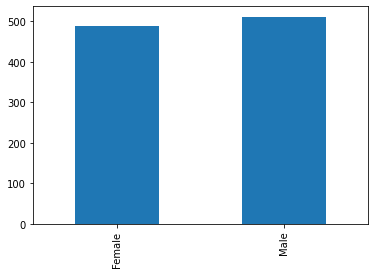

In [ ]:
df1['gender'].value_counts().sort_index().plot.bar()

In [ ]:
#convert location to numerical
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['location']= label_encoder.fit_transform(df1['location']) 
  
df1['location'].unique() 
df1['gender']=label_encoder.fit_transform(df1['gender'])

In [ ]:
df1.head()

,gender,location,income
0,0,683,569.95
1,1,289,991.89
2,1,590,792.01
3,0,669,850.09
4,1,659,481.72


In [ ]:
df2=df1.groupby(["income",'location'],as_index=False).mean()
df2.head()

,income,location,gender
0,10.20,102,1
1,10.46,911,0
2,10.78,248,0
3,100.74,831,0
4,100.83,631,1


In [ ]:
df3=df1.groupby(["income",'gender'],as_index=False).mean()
df3.head()

,income,gender,location
0,10.20,1,102
1,10.46,0,911
2,10.78,0,248
3,100.74,0,831
4,100.83,1,631


Insights


In [ ]:
df2.sort_values('income',ascending=False)


,income,location,gender
999,998.40,152,0
998,997.94,30,1
997,996.86,742,0
996,996.72,792,1
995,996.02,944,1
...,...,...,...
4,100.83,631,1
3,100.74,831,0
2,10.78,248,0
1,10.46,911,0


No gender bias as it comes to the income

location with highest income paid:




In [ ]:
#inversion encoding 
